## Table of Contents

* [Scenario](#chapter1)
* [About the project](#chapter2)
* [Database setup](#chapter3)
* [1. final Database diagram](#chapter4)
* [2.Creating the database](#chapter5)
* [3.Creating the table : patient](#chapter6)
    * [1 Adding a new column to the table](#section_6_1)
    * [2.Adding constraints and keys to the table ](#section_6_2)
* [4. Creating the table Doctor](#chapter7)
* [5.Creating the table Room](#chapter8)
     [1.Adding a foreign key to the patient table](#section_8_1)
* [6.Creating the table Check_IN_Out](#chapter9)
* [7.Inserting the data into the doctor table](#chapter10)
* [8.Inserting the data into patient table](#chapter11)
* [9.Inserting the data into room table](#chapter12)
* [10.Inserting the data into check_in_out table](#chapter13)
     * [1.updating the table check_in_out table](#section_13_1)
* [11.Querying the database using R](#chapter14)
     * [1.Queries](#section_14_1)

## 👀 Scenario <a class="anchor" id="chapter1">
An important part of any organization or any business is maintaining a database and ensuring that its data is organized and stored in a way that makes it easy to find , use and analyze.
for this aim , databases may come handy since it allows any organization to keep track of information like attendance/leave,performance among other details.

## ❓ About the project <a class="anchor" id="chapter2">
The objective of this project is to create a database for an hospital. 
The database will contain details about : the patients , the doctors , the rooms and the check in & out and thus include the following tables.
we will create this database in Microsofts Sql Server.
<h3 id="Patient"><code>Patient</code></h3>
 
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| Patient_ID             |  Patient's ID  |
| Patient_Name                | Patient's full Name.                 |
| Patient_Age             |  Patient's Age.  |
| Patient Address               | Patient's Address.                 |
| Patient_Gender            |  Patient's Gender.  |
| Disease               | Patient's disease              |

</div>
    
    
<h3 id="Doctor"><code>Doctor</code></h3>
 
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| Doctor_ID            |  Doctor's ID |
| Doctor_Name              | Doctor's full Name              |
| Doctor_Age              | Doctor's Age           |
| Doctor_Gender             | Doctor's Gender               |
| Doctor_Address             | 	Doctor's Address           |
    
</div>

<h3 id="Room"><code>Room</code></h3>    
    
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| Room_no         |  Room Number |
| Room_type           | Room type : shared vs premium etc..         |
| Room_status             | 	Room status : empty / reserved.     |
</div>
    
 <h3 id="Room"><code>Check_IN_Out</code></h3>    
    
<div align="center">

| Variable              | Description                                                                                   |
|:----------------------|:----------------------------------------------------------------------------------------------|
| Patint_ID       |  Patient's ID |
| Room_no        | Room type : shared vs premium etc..         |
| join_date             | 	The date , the patient has joined the hospital.    |
| leave date             | 	The date , the patient left the hospital.    |
</div>

## ⚙️ Database setup <a class="anchor" id="chapter3">

### 1. final Database diagram <a class="anchor" id="chapter4">
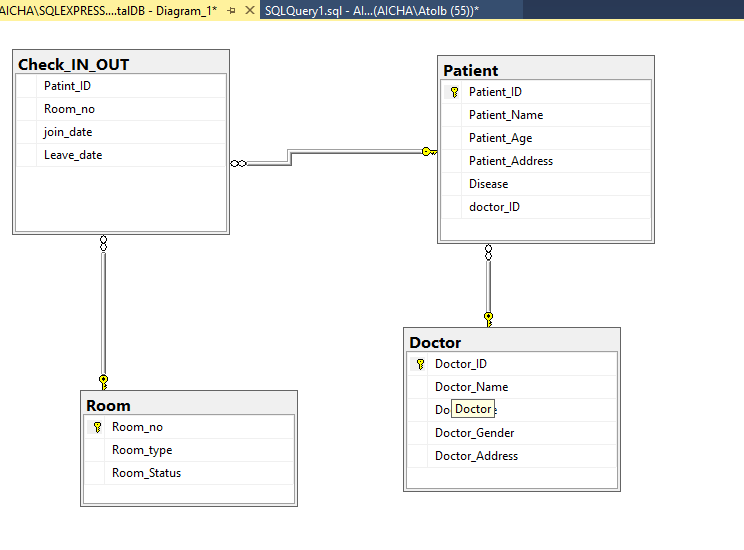

### 2. Creating the database <a class="anchor" id="chapter5">
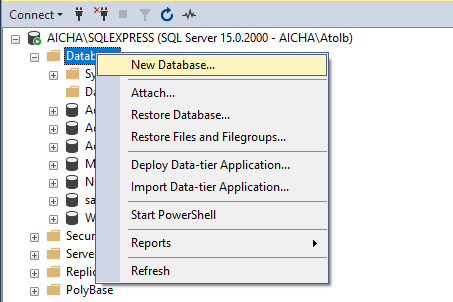
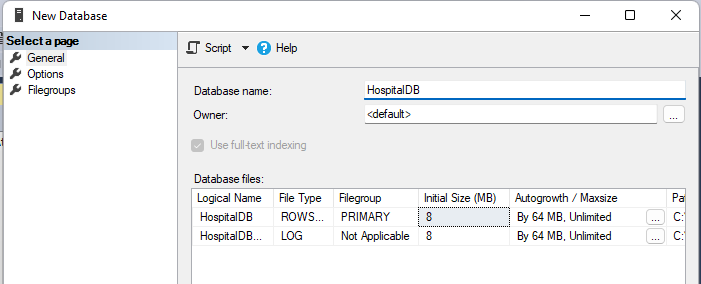
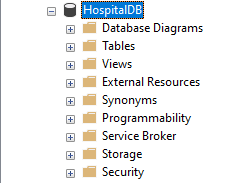

### 3. Creating the table : patient <a class="anchor" id="chapter6">
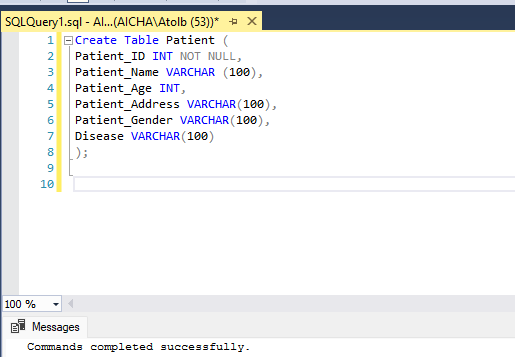

#### 3.1 adding a new column to the table <a class="anchor" id="section_6_1">
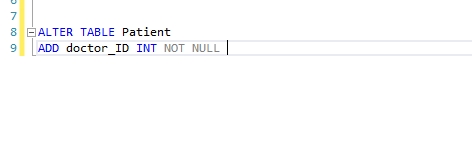

#### 3.2 Adding constraints and keys to the table <a class="anchor" id="section_6_2">
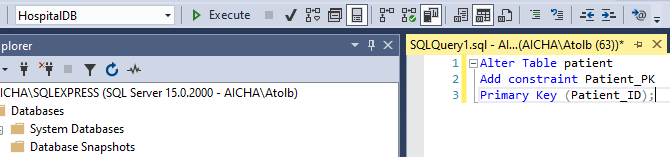

### 4.Creating the table Doctor <a class="anchor" id="chapter7">
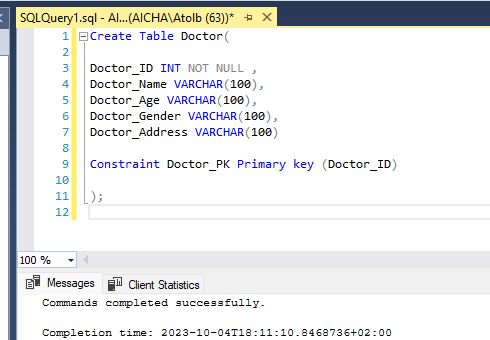

### 5. Creating the table Room <a class="anchor" id="chapter8">
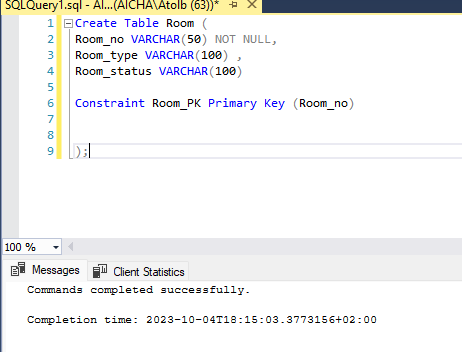


#### 5.1 Adding a foreign key to the patient table <a class="anchor" id="section_8_1">
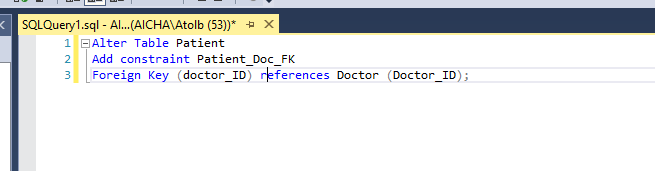


### 6. Creating the table Check_IN_Out <a class="anchor" id="chapter9">
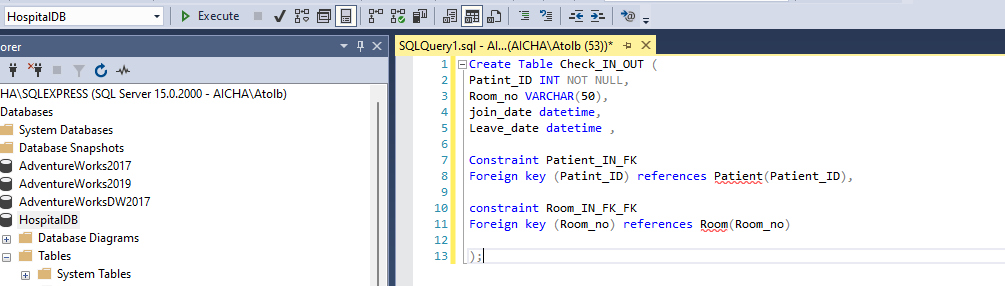

### 7. Inserting the data into the doctor table <a class="anchor" id="chapter10">
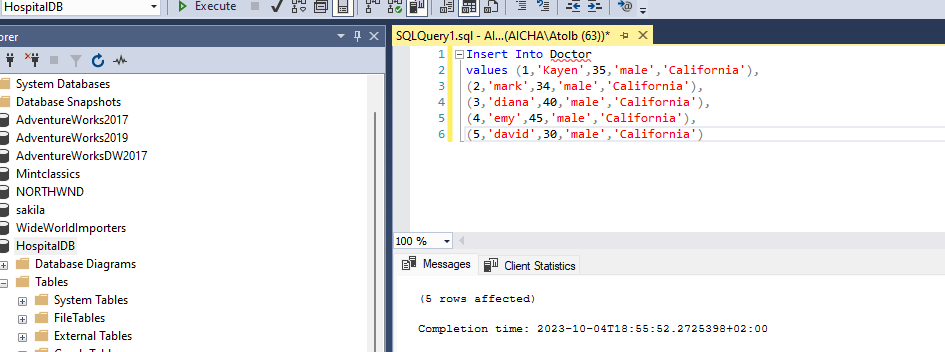

### 8. inserting the data into patient table <a class="anchor" id="chapter11">
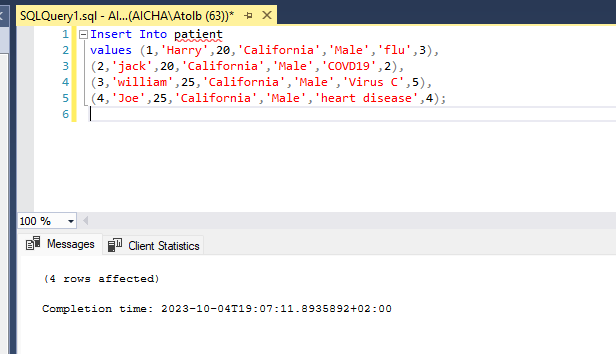

### 9. inserting the data into room table <a class="anchor" id="chapter12">
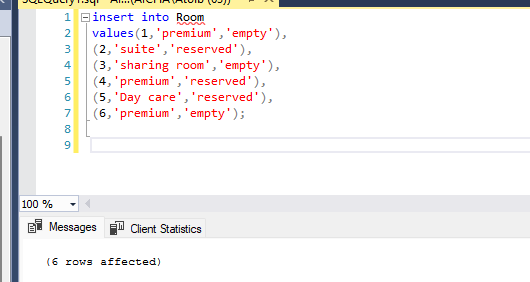

### 10. inserting the data into check_in_out table <a class="anchor" id="chapter13">

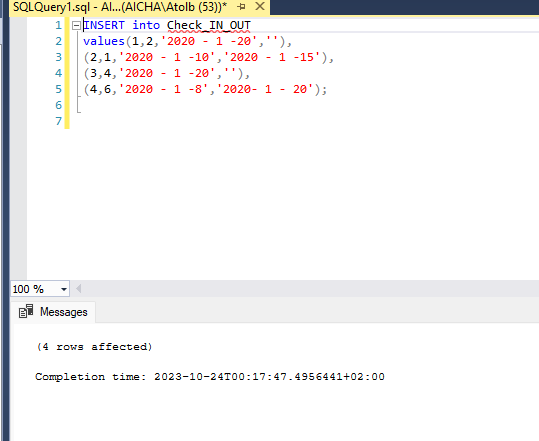

#### 10.1 updating the table check_in_out table <a class="anchor" id="section_13_1">
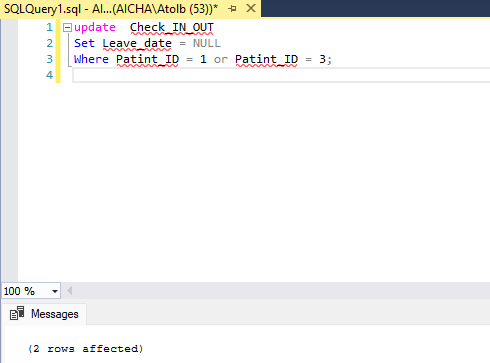
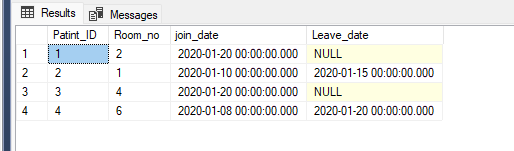

### 11. Querying the database using R <a class="anchor" id="chapter14">
By setting a direct connection to the database using R , we can query the database and extract information from the database tables.

In [1]:
# Loading the libraries 
library(RODBC)
library(odbc)
library(readr)
library(ggplot2)
library(data.table)
library(dplyr)

Warning message:
"package 'odbc' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# loading the SQL Connection
conn <- odbcConnect("Hospital")
conn

RODBC Connection 1
Details:
  case=nochange
  DSN=Hospital
  UID=
  Trusted_Connection=Yes
  WSID=AICHA
  DATABASE=HospitalDB

#### 11.1 Queries <a class="anchor" id="section_14_1">

In [3]:
Query1 <- sqlQuery(conn,"SELECT Patient_Name, Disease , Doctor_Name 
FROM Patient , Doctor 
Where Patient.Patient_ID = Doctor.Doctor_ID
")
Query1

Patient_Name,Disease,Doctor_Name
Harry,flu,Kayen
jack,COVID19,mark
william,Virus C,diana
joe,heart disease,emy


In [5]:
Query2 <- sqlQuery(conn,"
SELECT Patient.Patient_Name , Patient.Disease , Room.Room_no , Room.Room_Status , Check_IN_OUT.join_date,
Check_IN_OUT.Leave_date 
FROM Patient , Check_IN_OUT , Room 
Where Patient.Patient_ID = Check_IN_OUT.Patint_ID AND Check_IN_OUT.Room_no = Room.Room_no 
AND Check_IN_OUT.Leave_date != '' ")

Query2

Patient_Name,Disease,Room_no,Room_Status,join_date,Leave_date
jack,COVID19,1,empty,2020-01-10,2020-01-15
joe,heart disease,6,empty,2020-01-08,2020-01-20


In [6]:
Query3 <- sqlQuery(conn,"

SELECT Patient.Patient_Name , Patient.Patient_ID , Doctor.Doctor_Name , Patient.Disease , Doctor.Doctor_Age 
From Patient , Doctor 
Where Patient.doctor_ID = Doctor.Doctor_ID and Doctor.Doctor_Age > 35  ")

Query3

Patient_Name,Patient_ID,Doctor_Name,Disease,Doctor_Age
Harry,1,diana,flu,40
joe,4,emy,heart disease,45
